<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe30338-2021](https://jckantor.github.io/cbe30338-2021);
content is available [on Github](https://github.com/jckantor/cbe30338-2021.git).*


<!--NAVIGATION-->
< [6.0 Predictive Control](https://jckantor.github.io/cbe30338-2021/06.00-Predictive-Control.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [7.0 Projects](https://jckantor.github.io/cbe30338-2021/07.00-Projects.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/06.01-Static-Operability.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/06.01-Static-Operability.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# Lab Assignment 7

## Austin Booth

Link:

# 6.1 Static Operability

**Static operability** refers to the ability to operate a system under steady-state conditions. We are primarily interested in determining values for the manipulable inputs that acheive a desired process target, subject to all relevant operating constraints.

### 6.1.1 State Space Model

The state-space model for the Temperature Control Laboratory is given by

\begin{align}
\frac{dx}{dt} & = A x + B_u u + B_d d \\
y & = C x
\end{align}

where the structure of the matrix parameters and vector variables is given by

\begin{align}
\frac{d}{dt}\underbrace{\left[\begin{array}{c} T_{H,1} \\ T_{S,1} \\ T_{H,2} \\ T_{S,2} \end{array}\right]}_x
& = 
\underbrace{\left[\begin{array}{cccc}
-(\frac{U_a+U_b+U_c}{C^H_p}) & \frac{U_b}{C^H_p} & \frac{U_c}{C^H_p} & 0 \\
\frac{U_b}{C^S_p} & -\frac{U_b}{C^S_p} & 0 & 0 \\
\frac{U_c}{C^H_p} & 0 & -(\frac{U_a+U_b+U_c}{C^H_p}) & \frac{U_b}{C^H_p} \\
0 & 0 & \frac{U_b}{C^S_p} & -\frac{U_b}{C^S_p}
\end{array}\right]}_A
\underbrace{\left[\begin{array}{c}T_{H,1} \\ T_{S,1} \\ T_{H,2} \\ T_{S,2}\end{array}\right]}_x
+
\underbrace{\left[\begin{array}{cc}\frac{\alpha P_1}{C_p} & 0 \\ 0 & 0 \\ 0 & \frac{\alpha P_2}{C_p} \\ 0 & 0 \end{array}\right]}_{B_u}
\underbrace{\left[\begin{array}{c}u_1 \\ u_2\end{array}\right]}_u
+
\underbrace{\left[\begin{array}{c}\frac{U_a}{C^H_p} \\ 0 \\ \frac{U_a}{C^H_p} \\ 0 \end{array}\right]}_{B_d}
\underbrace{\left[\begin{array}{c}T_{amb}\end{array}\right]}_{d}
\end{align}

\begin{align}
\underbrace{\left[\begin{array}{c} T_1 \\ T_2 \end{array}\right]}_y
& = 
\underbrace{\left[\begin{array}{cccc} 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{array}\right]}_C
\underbrace{\left[\begin{array}{c}T_{H,1} \\ T_{S,1} \\ T_{H,2} \\ T_{S,2}\end{array}\right]}_x
\end{align}

## 6.1.1 Steady State Operability

## 6.1.2 Steady State Model

At steady-state our becomes

\begin{align}
0 & = A \bar{x} + B_u\bar{u} + B_d\bar{d} \\
\bar{y} & = C \bar{x} \\
\end{align}

where the overbar $\bar{u}$, $\bar{x}$, and $\bar{y}$ denote the steady-state value of $u$, $x$, and $y$, respectively. We assume $\bar{d}$ is known.

### 6.1.2.1 Steady-State input constraints

The constraints on $\bar{u}$ are given by upper and lower bounds

\begin{align}
0 & \leq \bar{u}_1 \leq 100 \\
0 & \leq \bar{u}_2 \leq 100 
\end{align}

when the values of $u_1$ and $u_2$ correspond to percentage of maximum power. 

### 6.1.2.2 Steady-State output constraints

We will assume there are upper limits for each of the temperature outputs

\begin{align}
\bar{y}_1 & \leq \bar{y}_1^{max} \\
\bar{y}_2 & \leq \bar{y}_2^{max}
\end{align}

when the values of $u_1$ and $u_2$ correspond to percentage of maximum power. 

### 6.1.2.3 Steady-State setpoint targets or ranges

The purpose of control is to find inputs $\bar{u}_1$ and $\bar{u}_2$ that cause the outputs to take on desired values. Those values could be specified as specific setpoints $\bar{r}_1^{SP}$ and $\bar{r}_2^{SP}$ in the form

\begin{align}
\bar{y}_1 & = \bar{r}_1^{SP} \\
\bar{y}_2 & = \bar{r}_2^{SP}
\end{align}

Alternatively, the desired operation could be specified by a range of values

\begin{align}
\bar{r}_1^{min} & \leq \bar{y}_1 \leq \bar{r}_1^{max} \\
\bar{r}_2^{min} & \leq \bar{y}_2 \leq \bar{r}_2^{max}
\end{align}

## 6.1.3 CVXPY Solution

### 6.1.3.1 Imports

In [2]:
import numpy as np
import cvxpy as cp

### 6.1.3.2 Model Parameters

In [3]:
# parameter estimates.
alpha = 0.00016       # watts / (units P * percent U1)
P1 = 200              # P units
P2 = 100              # P units
CpH = 4.46            # heat capacity of the heater (J/deg C)
CpS = 0.819           # heat capacity of the sensor (J/deg C)
Ua = 0.050            # heat transfer coefficient from heater to environment
Ub = 0.021            # heat transfer coefficient from heater to sensor
Uc = 0.0335           # heat transfer coefficient between heaters
Tamb = 21             # ambient room temperature

# state space model
A = np.array([[-(Ua + Ub + Uc)/CpH, Ub/CpH, Uc/CpH, 0], 
              [Ub/CpS, -Ub/CpS, 0, 0],
              [Uc/CpH, 0, -(Ua + Ub + Uc)/CpH, Ub/CpH],
              [0, 0, Ub/CpS, -Ub/CpS]])

Bu = np.array([[alpha*P1/CpH, 0], [0, 0], [0, alpha*P2/CpH], [0, 0]])

Bd = np.array([[Ua/CpH], [0], [Ua/CpH], [0]])

C = np.array([[0, 1, 0, 0], [0, 0, 0, 1]])

# initial values for states and inputs
u_initial = np.array([0, 0])
d_initial = np.array([Tamb])
x_initial = np.array([Tamb, Tamb, Tamb, Tamb])

### 6.1.3.3 CVXPY Model

The following cell implements some, but not all, elements of the steady state analysis as a CVXPY optimization model.

In [6]:
# knowns
d = d_initial            # disturbance
r = np.array([30, 40])   # setpoints

# unknowns to be computed
u = cp.Variable(2)
x = cp.Variable(4)
y = cp.Variable(2)

# objective
objective = cp.Minimize(0)

# model constraints
model_constraints = [
    0 == A@x + Bu@u + Bd@d,
    y == C@x]

# input constraints
input_constraints = [0 <= u, u <= 100]

# output constraints
output_constraints = []

# setpoints
setpoints = []

# solve problem
constraints = model_constraints + input_constraints + output_constraints + setpoints
problem = cp.Problem(objective, constraints)
problem.solve()

# display solution
print(f"u = {u.value}")
print(f"x = {x.value}")
print(f"y = {y.value}")

u = [49.99999582 49.99999704]
x = [48.38427119 48.38427119 42.08148107 42.08148107]
y = [48.38427119 42.08148107]


## 6.1.4 Lab Assigment 7

### 6.1.4.1 Exercise 1.

1. In the cells below, cut and paste the parameter values for matriix coefficients $A$, $B_d$, $B_u$ and $C$ to match those you previously identified for your copy of the Temperature Control Lab.

2. Using the CVXPY outline provided above, write a Python function named `feedforward` that accepts an estimate of $T_{amb}$, and setpoints for $T1$ and $T2$, and returns values for inputs $U1$ and $U2$. The function should constrain inputs U1 and U2 to values between 0 and 100%, constrain all temperatures to values no greater than 60 deg C. Use the the power settings required to set $T1 = 45$ and $T2 = 40$. Then create a simple event loop, and test these values on your hardware. How close was your result to the predicted value?

3. Write an optimization model to find the greatest temperature differential between $T1$ and $T2$ while limiting both to temperatures less than 60 deg C. Verify this prediction using your hardware.

### Part 1

In [5]:
# construct matrices based on Lab 5 results

# define parameters from Lab 2
CpH = 8.7738
CpS = 2.9110
Ua = 0.0495195
Ub = 0.273355
Uc = 0.0387042

# constant parameters
P1 = 200               # P1 units
P2 = 100               # P2 units
alpha = 0.00016        # watts / (units P1 * percent U1)

# construct arrays
A = np.array([[-(Ua + Ub + Uc)/CpH, Ub/CpH, Uc/CpH, 0], [Ub/CpS, -Ub/CpS, 0, 0],
              [Uc/CpH, 0, -(Ua + Ub + Uc)/CpH, Ub/CpH], [0, 0, Ub/CpS, -Ub/CpS]])  # 4x4
Bu = np.array([[alpha*P1/CpH, 0], [0, 0], [0, alpha*P2/CpH], [0, 0]])     # 4x2
Bd = np.array([[Ua/CpH], [0], [Ua/CpH], [0]])           # 4x1
C = np.array([[0, 1, 0, 0], [0, 0, 0, 1]])                   # 2x4

# print arrays
print('A:')
print(A)
print('Bu:')
print(Bu)
print('Bd:')
print(Bd)
print('C:')
print(C)

A:
[[-0.04121119  0.03115583  0.00441134  0.        ]
 [ 0.09390416 -0.09390416  0.          0.        ]
 [ 0.00441134  0.         -0.04121119  0.03115583]
 [ 0.          0.          0.09390416 -0.09390416]]
Bu:
[[0.00364722 0.        ]
 [0.         0.        ]
 [0.         0.00182361]
 [0.         0.        ]]
Bd:
[[0.00564402]
 [0.        ]
 [0.00564402]
 [0.        ]]
C:
[[0 1 0 0]
 [0 0 0 1]]


### Part 2

In [34]:
# set ambient temperature and initialize disturbance and x variables
from tclab import TCLab, setup, clock, Historian, Plotter

with TCLab() as lab:
    T1 = lab.T1
    T2 = lab.T2
    Tamb = (T1 + T2) / 2
    print('T_amb:', Tamb)

TCLab version 0.4.9
Arduino Leonardo connected on port COM6 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
T_amb: 24.766
TCLab disconnected successfully.


In [55]:
# define feedforward function

def feedforward(T_amb, SP1, SP2):

    d_initial = [Tamb]                       # initial disturbance input
    x_initial = np.array([Tamb, Tamb, Tamb, Tamb])       # initial steady state
    x = x_initial

    # knowns
    d = d_initial            # disturbance
    r = np.array([SP1, SP2])   # setpoints
        
    # unknowns to be computed
    u = cp.Variable(2)
    x = cp.Variable(4)
    y = cp.Variable(2)
        
    # objective
    objective = cp.Minimize(0)

    # model constraints
    model_constraints = [
        0 == A@x + Bu@u + Bd@d,
        y == C@x]

    # input constraints
    input_constraints = [0 <= u, u <= 100]

    # output constraints
    output_constraints = [x <= 60, y <= 60]

    # setpoints
    setpoints = [y == r]

    # solve problem
    constraints = model_constraints + input_constraints + output_constraints + setpoints
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    return u, x, y



# set setpoints    
SP1 = 45
SP2 = 40

(u, x, y) = feedforward(T_amb, SP1, SP2)

# display solution
print(f"u = {u.value}")
print(f"x = {x.value}")
print(f"y = {y.value}")

u = [37.35933009 35.05369144]
x = [45. 45. 40. 40.]
y = [45. 40.]


In [54]:
def experiment(feedforward, SP1, SP2, t_final=900, t_step=2):
    
    with TCLab() as lab:
        
        # setup historian and plotter        
        h = Historian(lab.sources)
        p = Plotter(h, t_final)
        
        # initialize event loop
        lab.Q1(0)
        lab.Q2(0)

        for t in clock(t_final, t_step):
            # get new measurement
            u, xPred, yPred = feedforward(T_amb, SP1, SP2)
            
            y = [lab.T1, lab.T2]
            
            # set input for next period
            lab.Q1(u[0].value)
            lab.Q2(u[1].value)
            
            # update plotter and historian
            p.update(t)
            
        print('Steady-state T1:',lab.T1,'C')
        print('Steady-state T2:',lab.T2,'C')

            
    return h

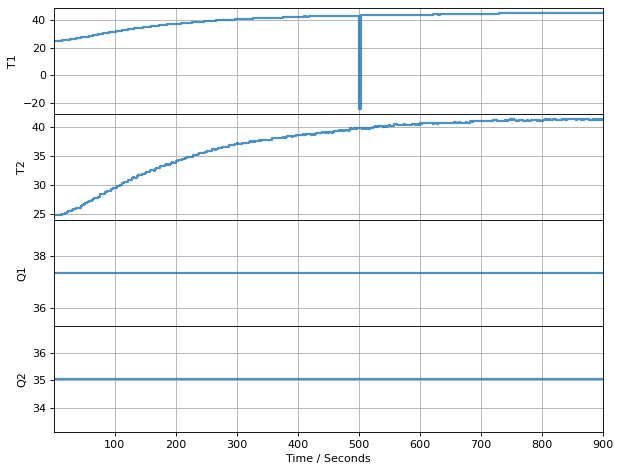

Steady-state T1: 44.907 C
Steady-state T2: 41.266 C
TCLab disconnected successfully.


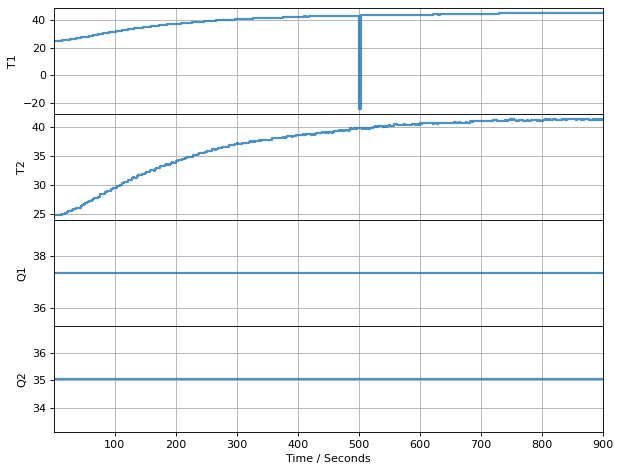

In [63]:
# run with given set points
SP1 = 45
SP2 = 40
experiment(feedforward, SP1, SP2)

Unfortunately, there was a glitch with sensor 1 that interfered with this graph display, but both T1 and T2 reached temperatures close to their set points. At steady state, T1 ended up around 44.9 C and T2 ended up around 41.25 C. These results are fairly close to the predicted temperatures / set points of 45 and 40 C. T1 deviated from its set point by about 0.1 degree C and T2 deviated from its set point by 1.25 C at the end of the experiment.

### Part 3

In [67]:
# define feedforward function with no set point inputs, just optim.
# this function uses T1 - T2

def feedforward2(T_amb):

    d_initial = [Tamb]                       # initial disturbance input
    x_initial = np.array([Tamb, Tamb, Tamb, Tamb])       # initial steady state
    x = x_initial

    # knowns
    d = d_initial            # disturbance
    r = np.array([SP1, SP2])   # setpoints
        
    # unknowns to be computed
    u = cp.Variable(2)
    x = cp.Variable(4)
    y = cp.Variable(2)
        
    # objective
    objective = cp.Maximize(y[0]-y[1])

    # model constraints
    model_constraints = [
        0 == A@x + Bu@u + Bd@d,
        y == C@x]

    # input constraints
    input_constraints = [0 <= u, u <= 100]

    # output constraints
    output_constraints = [x <= 60, y <= 60]

    # setpoints
    setpoints = []

    # solve problem
    constraints = model_constraints + input_constraints + output_constraints + setpoints
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    return u, x, y


(u, x, y) = feedforward2(T_amb)

# display solution
print(f"u = {u.value}")
print(f"x = {x.value}")
print(f"y = {y.value}")


u = [7.84440575e+01 2.08889947e-08]
x = [59.99999998 59.99999998 40.22334063 40.22334063]
y = [59.99999998 40.22334063]


In [68]:
# define feedforward function with no set point inputs, just optim.
# this function uses T2 - T1

def feedforward3(T_amb):

    d_initial = [Tamb]                       # initial disturbance input
    x_initial = np.array([Tamb, Tamb, Tamb, Tamb])       # initial steady state
    x = x_initial

    # knowns
    d = d_initial            # disturbance
    r = np.array([SP1, SP2])   # setpoints
        
    # unknowns to be computed
    u = cp.Variable(2)
    x = cp.Variable(4)
    y = cp.Variable(2)
        
    # objective
    objective = cp.Maximize(y[1]-y[0])

    # model constraints
    model_constraints = [
        0 == A@x + Bu@u + Bd@d,
        y == C@x]

    # input constraints
    input_constraints = [0 <= u, u <= 100]

    # output constraints
    output_constraints = [x <= 60, y <= 60]

    # setpoints
    setpoints = []

    # solve problem
    constraints = model_constraints + input_constraints + output_constraints + setpoints
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    return u, x, y


(u, x, y) = feedforward3(T_amb)

# display solution
print(f"u = {u.value}")
print(f"x = {x.value}")
print(f"y = {y.value}")


u = [1.15286291e-08 9.99999999e+01]
x = [34.61846117 34.61846117 47.22404274 47.22404274]
y = [34.61846117 47.22404274]


feedforward2 gives better result (because heater 1 has more power), so use feedforward2 in experiment.

In [69]:
def experiment2(feedforward2, t_final=900, t_step=2):
    
    with TCLab() as lab:
        
        # setup historian and plotter        
        h = Historian(lab.sources)
        p = Plotter(h, t_final)
        
        # initialize event loop
        lab.Q1(0)
        lab.Q2(0)

        for t in clock(t_final, t_step):
            # get new measurement
            u, xPred, yPred = feedforward2(T_amb)
            
            # set input for next period
            lab.Q1(u[0].value)
            lab.Q2(u[1].value)
            
            # update plotter and historian
            p.update(t)
            
        print('Steady-state T1:',lab.T1,'C')
        print('Steady-state T2:',lab.T2,'C')

            
    return h

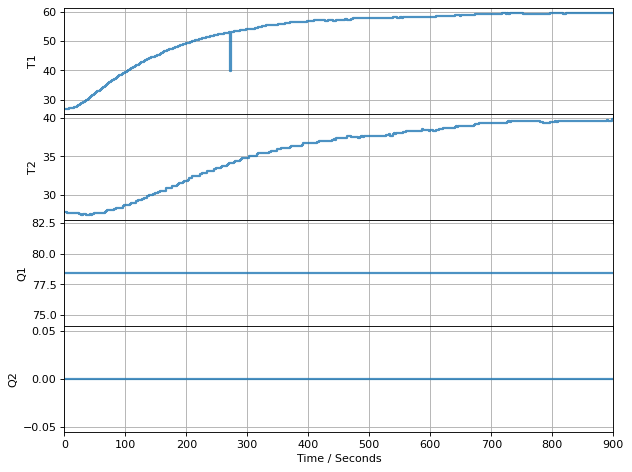

Steady-state T1: 59.57 C
Steady-state T2: 39.848 C
TCLab disconnected successfully.


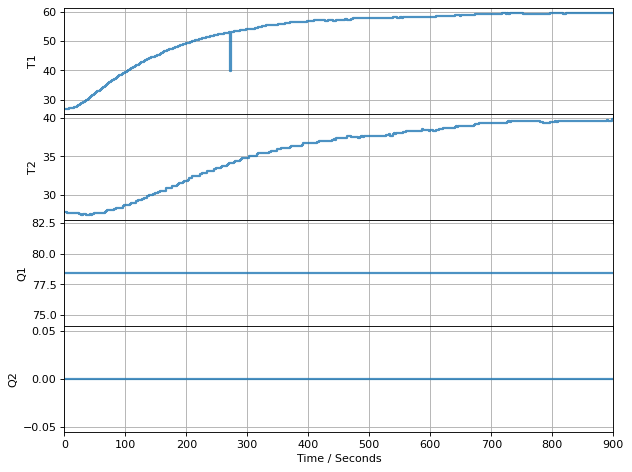

In [70]:
# run experiment
experiment2(feedforward2)

The optimization function predicted a maximum temperature differential of about 19.8 degrees C (60 vs. 40.2). In reality, the experimental temperature differential was very close to this, at about 19.7 C. The final temperatures, 59.6 and 39.8 C, were also very close to predicted final temperatures.

<!--NAVIGATION-->
< [6.0 Predictive Control](https://jckantor.github.io/cbe30338-2021/06.00-Predictive-Control.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [7.0 Projects](https://jckantor.github.io/cbe30338-2021/07.00-Projects.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/06.01-Static-Operability.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/06.01-Static-Operability.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>